In [2]:
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import optim
import torchviz
import warnings
warnings.filterwarnings('ignore')

In [3]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH, nY, nZ):
        super().__init__()
        
        self.layer_1 = nn.Linear(nX, nH)
        self.layer_2 = nn.Linear(nH, nY)
        self.layer_out = nn.Linear(nY, nZ)
        
        self.activate_1 = nn.Sigmoid()
        self.activate_2 = nn.ReLU()
        self.activate_out = nn.Sigmoid()
        
    def forward(self, X):
        X = self.activate_1(self.layer_1(X))
        X = self.activate_2(self.layer_2(X))
        X = self.activate_out(self.layer_out(X))
        return X

In [4]:
def fit(model, X, Y, batch_size = 100, train = True):
    model.train(train)
    sumMSE, sumA, numB = 0, 0, int(len(X)/batch_size)
    for i in range(0, numB*batch_size, batch_size):
        xb = X[i: i+batch_size]
        yb = Y[i: i+batch_size]
        y = model(xb)
        mse_tensor = mse(y, yb)
        
        if train:
            optimizer.zero_grad()
            mse_tensor.backward()
            optimizer.step()
        
        sumMSE += mse_tensor.item()
        sumA += (y.round() == yb).float().mean()
    
    return sumMSE/numB, sumA/numB

In [5]:
X = torch.randn(2200, 2)

In [6]:
def interesting_function(x):
    y = (torch.sin(x[:, 0]) + torch.cos(x[:, 1]**2)).float().view(-1,1)
    return y

def homework_function(x):
    y = (torch.sum((x - 0.5)**2, axis=1) < 0.1).float().view(-1,1)
    return y

In [7]:
Y_home = homework_function(X)
Y_test = interesting_function(X)

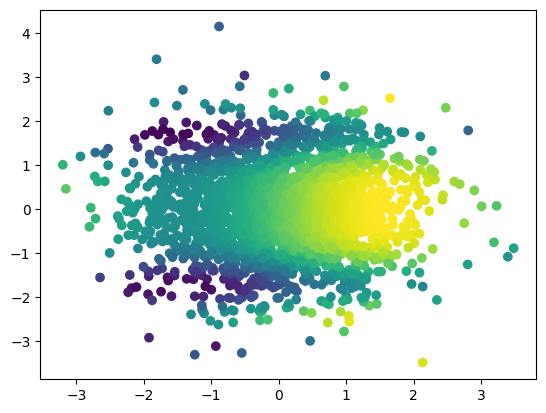

In [8]:
plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=Y_test.numpy())
plt.show()

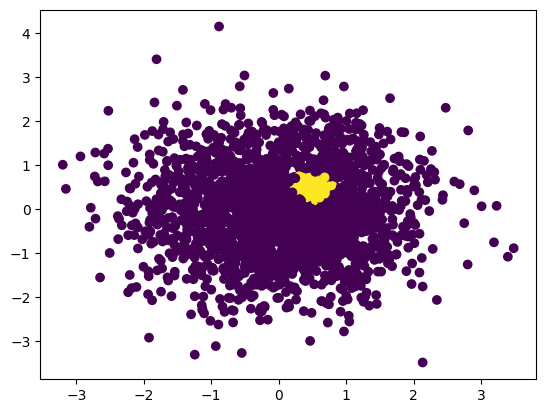

In [9]:
plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=Y_home.numpy())
plt.show()

In [10]:
nX, nH, nY, nZ = 2, 5, 1, 6
model = ThreeLayersNet(nX, nH, nY, nZ)
mse = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
def get_score(Y):   
    print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y_home) )
    epochs = 1000                                            
    for epoch in range(epochs):                              
        MSE,A = fit(model, X, Y)                               
        if epoch % 100 == 0 or epoch == epochs-1:             
            print(f' epoch: {epoch:5d} MSE: {MSE:.4f} accuracy: {A:.4f}' ) 

In [12]:
get_score(Y_home)

before:      loss: 0.3507 accuracy: 0.3474
 epoch:     0 MSE: 0.3318 accuracy: 0.3474
 epoch:   100 MSE: 0.0705 accuracy: 0.9577
 epoch:   200 MSE: 0.0449 accuracy: 0.9577
 epoch:   300 MSE: 0.0411 accuracy: 0.9577
 epoch:   400 MSE: 0.0405 accuracy: 0.9577
 epoch:   500 MSE: 0.0405 accuracy: 0.9577
 epoch:   600 MSE: 0.0405 accuracy: 0.9577
 epoch:   700 MSE: 0.0405 accuracy: 0.9577
 epoch:   800 MSE: 0.0405 accuracy: 0.9577
 epoch:   900 MSE: 0.0405 accuracy: 0.9577
 epoch:   999 MSE: 0.0405 accuracy: 0.9577


In [13]:
get_score(Y_test)

before:      loss: 0.0405 accuracy: 0.9577
 epoch:     0 MSE: 1.0998 accuracy: 0.0000
 epoch:   100 MSE: 0.8113 accuracy: 0.0000
 epoch:   200 MSE: 0.8078 accuracy: 0.0000
 epoch:   300 MSE: 0.8078 accuracy: 0.0000
 epoch:   400 MSE: 0.8078 accuracy: 0.0000
 epoch:   500 MSE: 0.8078 accuracy: 0.0000
 epoch:   600 MSE: 0.8078 accuracy: 0.0000
 epoch:   700 MSE: 0.8078 accuracy: 0.0000
 epoch:   800 MSE: 0.8078 accuracy: 0.0000
 epoch:   900 MSE: 0.8078 accuracy: 0.0000
 epoch:   999 MSE: 0.8078 accuracy: 0.0000


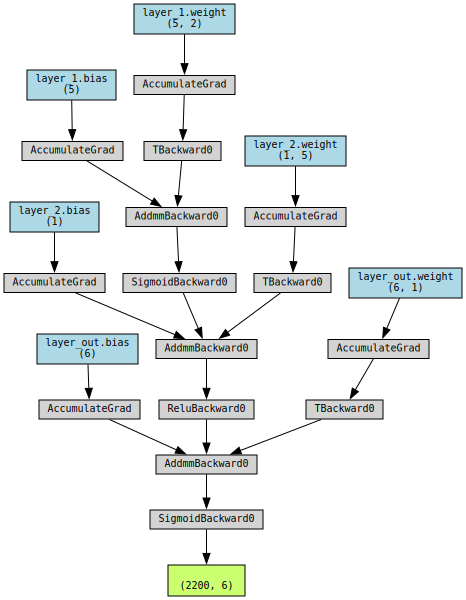

In [14]:
torchviz.make_dot(model(X), params=dict(model.named_parameters()))